In [6]:
import seaborn as sns
import pandas as pd

# Загрузка данных о пингвинах
penguins = sns.load_dataset('penguins')

# Просмотр первых строк данных
print(penguins.head())

# Проверка на пропущенные значения
print(penguins.isnull().sum())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


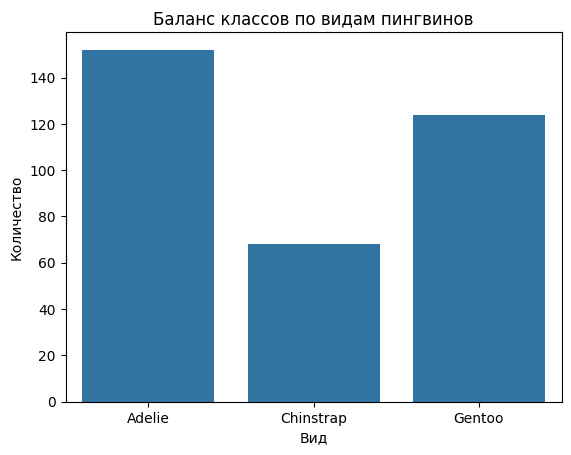

In [7]:
import matplotlib.pyplot as plt

# Построение гистограммы
sns.countplot(data=penguins, x='species')
plt.title('Баланс классов по видам пингвинов')
plt.xlabel('Вид')
plt.ylabel('Количество')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

# Удаление строк с пропущенными значениями
penguins = penguins.dropna()

# Определение признаков и целевой переменной
X = penguins.drop('species', axis=1).select_dtypes(exclude='object')
y = penguins['species']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Инициализация моделей
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Обучение моделей и построение матриц ошибок
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix for {model_name}:\n{cm}\n')


Confusion Matrix for Logistic Regression:
[[30  1  0]
 [ 0 13  0]
 [ 0  0 23]]

Confusion Matrix for SVM:
[[29  0  2]
 [13  0  0]
 [ 3  0 20]]

Confusion Matrix for KNN:
[[25  2  4]
 [ 5  8  0]
 [ 0  1 22]]



In [16]:
from sklearn.metrics import classification_report

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'Classification Report for {model_name}:\n{classification_report(y_test, y_pred, zero_division=0)}\n')

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        31
   Chinstrap       0.93      1.00      0.96        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67


Classification Report for SVM:
              precision    recall  f1-score   support

      Adelie       0.64      0.94      0.76        31
   Chinstrap       0.00      0.00      0.00        13
      Gentoo       0.91      0.87      0.89        23

    accuracy                           0.73        67
   macro avg       0.52      0.60      0.55        67
weighted avg       0.61      0.73      0.66        67


Classification Report for KNN:
              precision    recall  f1-score   support

      Adelie       0.83      0.81      0.82        31
   Chinstrap      